<span style="font-size:110%; text-align:left;"><b><a href="../index.html">3.Gaussian Beams</a> > <a href="./index.html">3.Mirror maps</a></b></span>
<br/><br/>
<span style="font-size:200%; text-align:left;"><b>1. Phase Maps</b></span>
<br/>

# Table of Contents
 <p><div class="lev1"><a href="#Introduction"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></div><div class="lev1"><a href="#The-FINESSE/PyKat-phase-maps"><span class="toc-item-num">2&nbsp;&nbsp;</span>The FINESSE/PyKat phase maps</a></div><div class="lev2"><a href="#The-phase-map-file-format"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The phase map file format</a></div><div class="lev2"><a href="#Read-phase-map-file-into-PyKat"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read phase map file into PyKat</a></div><div class="lev2"><a href="#(row,-column)-vs.-(x,-y)"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>(row, column) vs. (x, y)</a></div><div class="lev2"><a href="#Attributes-of-the-surfacemap-objects"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Attributes of the <code>surfacemap</code>-objects</a></div><div class="lev1"><a href="#Reading-other-map-formats"><span class="toc-item-num">3&nbsp;&nbsp;</span>Reading other map formats</a></div>

# Introduction

These mirror surface maps called phase maps are used to specify defect optical surfaces. The phase map is essentially a matrix specifying surface heights in a user defined unit (here commonly nm), which makes the name a bit confusing as it sounds like the map would specify phases. But as the surface heights specifies the path length propagated by the laser field, these heights give rise to phase changes.

** Recommended notebooks before you start:**

We recommend that you have done some modeling modeling using Gaussian waves before you start this one. Mirror maps will not be useful otherwise.

**Reading material and references:**

[1] [A. Freise, K. Strain, D. Brown, and C. Bond, "Interferometer Techniques for Gravitational-Wave Detection", *Living Reviews in Relativity* **13**, 1 (2010)](http://arxiv.org/pdf/0909.3661v3). - Living review article (more like a book) on laser interferometry in the frequency domain for detecting gravitational waves, and FINESSE.

[2] [A. Freise, D. Brown, and C. Bond, "Finesse, Frequency domain INterferomEter Simulation SoftwarE"](http://kvasir.sr.bham.ac.uk/redmine/attachments/download/131/Finesse_2.0_manual.pdf). - FINESSE-manual

[3] [FINESSE syntax reference](http://www.gwoptics.org/finesse/reference/) - Useful online syntax reference for FINESSE. Also available in the Finesse manual [2], but this online version is updated more often.

** After this session you will be able to... **

* 

# The FINESSE/PyKat phase maps

We start by loading PyKat and other Python packages that we need:

In [1]:
import numpy as np                         # Importing numpy
import matplotlib                          # For plotting
import matplotlib.pyplot as plt                   
from pykat import finesse                  # Importing the pykat.finesse package
from pykat.commands import *               # Importing all packages in pykat.commands.
from pykat.optics.maps import *            # Importing maps package
from IPython.display import display, HTML  # Allows us to display HTML.

# Telling the notebook to make plots inline.
%matplotlib inline      
# Initialises the PyKat plotting tool. Change dpi value 
# to change figure sizes on your screen.
pykat.init_pykat_plotting(dpi=90)          

                                              ..-
    PyKat 1.0.14          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



## The phase map file format

The FINESSE mirror map files start with 6 lines of information.

* Surface map: Header that is the same in all map files
* Name: Name of the map
* Type: Specifies the type of map. The first word can be phase, absorption, or reflectivity. The second word specifies if the reflected, transmitted, or both fields are affected by the mirror map. The reflectivity map always affect both fields.
* Size: Specifies the size of the data stored in the file. The first number is the number of rows, and the second is the number of columns.
* Optical center: Expressed in x and y coordinates in units of grid points, which is in contrast to rows/columns for the data size above. Here, x corresponds to columns and y corresponds to rows.
* Step size: Physical step size between two data points, expressed in meters. Note that you can chose to have different step sizes in the x and y directions. 
* Scaling: The unit of the data. In the figure below, the ones in the data corresponds to 1 nm since a scaling of 1e-09 is set.
* The data: a matrix of data where the top row corresponds to the lowest part of the mirror.

<img src="file_format.svg" style="width: 300px;"/>

##  Read phase map file into PyKat

Assume we have a mirror surface spelling out "Hello, World!". We could guess that the FINESSE phase map file would look like this:

<img src="hello_world_flipped_finesse.png" style="width: 700px;"/>

However, when we read this file into PyKat, and plotting it, it looks upside down:

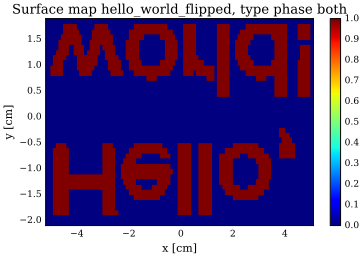

In [2]:
smap1 = read_map('hello_world_flipped_finesse.txt', mapFormat='finesse')

# filename = smap_test.name + '_finesse.txt'
# smap_test.write_map(filename)
fig1 = smap1.plot()

Thus, row 1 in the file corresponds to lowest part of the mirror, so the correct file looks like this:

<img src="hello_world_finesse.png" style="width: 700px;"/>

We see that this is correct by reading it into PyKat and plotting:

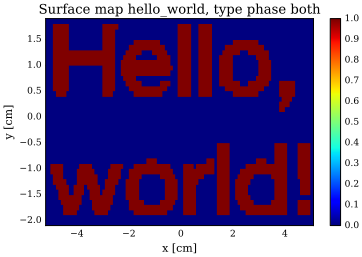

In [3]:
smap2 = read_map('hello_world_finesse.txt', mapFormat='finesse')
fig2 = smap2.plot()

##  (row, column) vs. (x, y) 

In matrices the first index of a 2D matrix usually specifies the row, while the second specifies the column. However, in a xy-coordinate system, the first number usually specifies the x-coordinate and the second number specifies the y-coordinate. Since x and y normally are plotted as corresponding to columns and rows respectively, there is easy to be confused when switching between (row,column) and (x,y). Se here we go through how this is defined here. By using the  `numpy.array` attribute `shape`:

In [4]:
rcSize = smap2.data.shape
print('Data size (rows, columns): {}'.format(rcSize))

Data size (rows, columns): (41, 104)


we can see that the data matrix consists of 41 rows and 104 columns. By using the `surfacemap` attribute `size`:

In [5]:
xySize = smap2.size
print('Data size (x, y): {}'.format(xySize))

Data size (x, y): (104, 41)


we obtain the size of the data matrix in terms of (x, y), thus 104 x-values while 41 y-values. We can conclude that x-values corresponds to columns, and the y-values corresponds to rows.

If we plot the 15 first rows and 60 first columns of the data matrix against the 15 first y-values and the 60 first x-values we get this figure:

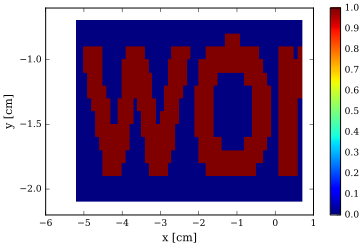

In [6]:
d = smap2.data[0:15,0:60]
fig3 = plt.figure()
pcm = plt.pcolormesh(smap2.x[0:60]*100, smap2.y[0:15]*100, d)
pcm.set_rasterized(True)
cbar = plt.colorbar()
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.show(fig3)

Clearly, $(r,c) = (0,0)$ of the data matrix `surfacemap.data` is in the lower left corner. 

##  Attributes of the `surfacemap`-objects

* **`name`:** The name of the surface map. 
* **`type`:** String with two words specifying the type of the map. The first word can be phase, absorption, or reflectivity. The second word specifies if the reflected, transmitted, or both fields are affected by the mirror map. The reflectivity map, however, always affect both fields.
* **`data`:** 2D `numpy.ndarray` with real numbers specifying surface heights. The height in meters is obtained by multiplying the with the attribute `scaling`.
* **`notNan`:** 2D `numpy.ndarray` with booleans keeping track on which elements in `data` that are not NaN. 
* **`x`:** `numpy.ndarray` with x-values in meters. The physical spacing between the data points is specified by the attribute `step_size`.
* **`y`:** `numpy.ndarray` with y-values in meters. The physical spacing between the data points is specified by the attribute `step_size`.
* **`center`:** Tuple of length two specifying the position the beam hits the mirror map in FINESSE. The unit is data points and it is given on the format `center = (x0, y0)`. Usually this is the same spot as the center of the mirror, but it can be offset by setting the attribute xyOffset. In that case, `center` = `xyOffset` + 'mirror center'.
* **`step_size`:** Tuple of length two where the first/second element specifies step size in x/y.
* **`scaling`:** Scaling of the data in meters.
* **`xyOffset`:** Offsets the `center`, i.e., where the beam hits the mirror map.

**Add more attributes, both above and below**

In [7]:
print('* name: {}'.format(smap2.name))
print('* type: {}'.format(smap2.type))
print('* data: {}'.format(smap2.data))
print('* notNan: {}'.format(smap2.notNan))
print('* x: {}'.format(smap2.x))
print('* y: {}'.format(smap2.y))
print('* center: {}'.format(smap2.center))
print('* step_size: {}'.format(smap2.step_size))
print('* scaling: {}'.format(smap2.scaling))
print('* xyOffset: {}'.format(smap2.xyOffset))

* name: hello_world
* type: phase both
* data: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  1.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
* notNan: [[ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]]
* x: [-0.052 -0.051 -0.05  -0.049 -0.048 -0.047 -0.046 -0.045 -0.044 -0.043
 -0.042 -0.041 -0.04  -0.039 -0.038 -0.037 -0.036 -0.035 -0.034 -0.033
 -0.032 -0.031 -0.03  -0.029 -0.028 -0.027 -0.026 -0.025 -0.024 -0.023
 -0.022 -0.021 -0.02  -0.019 -0.018 -0.017 -0.016 -0.015 -0.014 -0.013
 -0.012 -0.011 -0.01  -0.009 -0.008 -0.007 -0.006 -0.005 -0.004 -0.003
 -0.002 -0.001  0.     0.001  0.002  0.003  0.004  0.005  0.006  0.007
  0.008  0.009  0.01   0.011  0.012  0.0

# Reading other map formats

Reading the binary metroPro format:

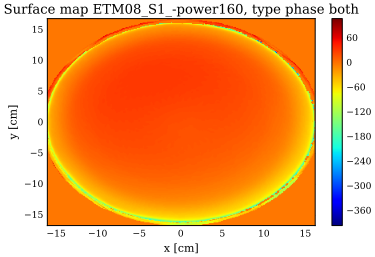

In [8]:
# Reading metroPro map
smap4a = read_map('ETM08_S1_-power160.dat', mapFormat='metroPro')
fig4a = smap4a.plot()

Reading the Zygo xyz-format:

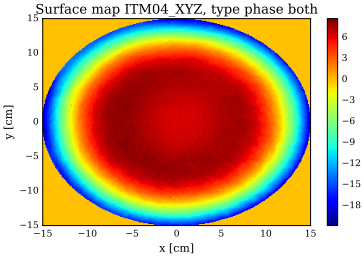

In [9]:
# Reading Zygo xyz-map
smap4b = read_map('ITM04_XYZ.xyz', mapFormat='zygo')
fig4b = smap4b.plot()

Reading the Zygo ascii-format:

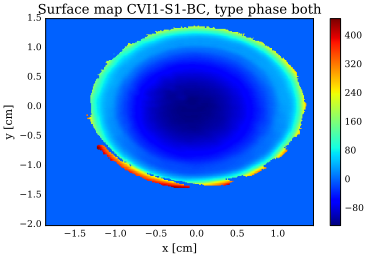

In [10]:
# Reading Zygo ascii-map
smap4c = read_map('CVI1-S1-BC.asc', mapFormat='zygo')
fig4c = smap4c.plot()

Reading LIGO/Zygo ascii-map:

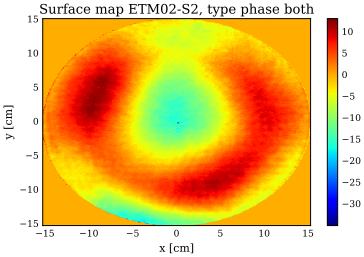

In [11]:
# Reading ligo ascii-map
smap4d = read_map('ETM02-S2_asc.dat', mapFormat='ligo')
fig4d = smap4d.plot()

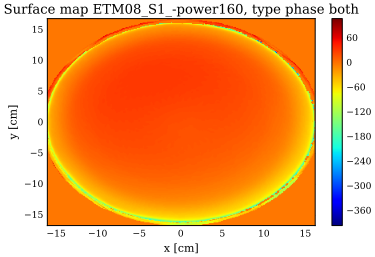

In [12]:
# Writing map to file
filename = smap4a.name + '_finesse.txt'
smap4a.write_map(filename)
# Reading finesse map (that was just written to file)
smap4e = read_map(filename,mapFormat='finesse')
fig4e = smap4e.plot()